In [129]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [130]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [131]:
NUM_CLASSES = 7

# Dataset reading

In [132]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [133]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [135]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [136]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_14 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [138]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [139]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - accuracy: 0.2266 - loss: 2.0175
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2160 - loss: 1.8828 - val_accuracy: 0.3854 - val_loss: 1.6476
Epoch 2/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2734 - loss: 1.7483
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.3092 - loss: 1.6773 - val_accuracy: 0.4084 - val_loss: 1.4534
Epoch 3/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3828 - loss: 1.5041
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.3888 - loss: 1.5277 - val_accuracy: 0.4502 - val_loss: 1.3104
Epoch 4/1000
 1/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4297 - loss: 1.4781
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.k

In [140]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.9222 - loss: 0.4176


In [141]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [142]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[8.2985534e-05 9.0347004e-01 2.2672348e-02 2.2876710e-03 5.8407068e-02
 7.8310715e-03 5.2487277e-03]
1


# Confusion matrix

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


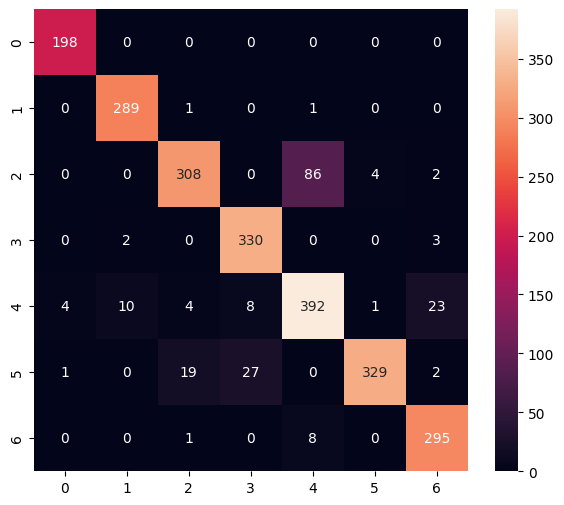

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       198
           1       0.96      0.99      0.98       291
           2       0.92      0.77      0.84       400
           3       0.90      0.99      0.94       335
           4       0.80      0.89      0.84       442
           5       0.99      0.87      0.92       378
           6       0.91      0.97      0.94       304

    accuracy                           0.91      2348
   macro avg       0.92      0.93      0.92      2348
weighted avg       0.92      0.91      0.91      2348



In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [144]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [145]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/v7/wvcqbws145q765t9zybx3fs00000gn/T/tmphrwkiuos/assets


INFO:tensorflow:Assets written to: /var/folders/v7/wvcqbws145q765t9zybx3fs00000gn/T/tmphrwkiuos/assets


Saved artifact at '/var/folders/v7/wvcqbws145q765t9zybx3fs00000gn/T/tmphrwkiuos'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_7')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  13446261040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13440310960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  4396605680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13393920592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13383854736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13420657648: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1718304278.839162 13719580 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1718304278.839172 13719580 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.


6704

# Inference test

In [146]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [147]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [148]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [149]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 69 µs, sys: 16 µs, total: 85 µs
Wall time: 83.2 µs


In [150]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.2985607e-05 9.0346992e-01 2.2672359e-02 2.2876740e-03 5.8407109e-02
 7.8310780e-03 5.2487371e-03]
1
